# Predicting Car Prices

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
col_names = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors' , 'body_style', 
        'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 
        'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data", names = col_names)

In [3]:
cars

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


## Data cleaning
Keep numeric columns only

In [4]:
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 
        'engine_size', 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars_numeric = cars[numeric_cols]
cars_numeric.head(5)

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized_losses    205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_rate     205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


In [6]:
cars_numeric = cars_numeric.replace('?', value = np.nan)
cars_numeric

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
cars_numeric = cars_numeric.astype('float')
cars_numeric['normalized_losses'].isnull().sum()

41

Since the Normalized Losses column has abount 20% missing value, it will be droped entirely.
Also drop rows with missing values.


In [8]:
cars_numeric = cars_numeric.drop('normalized_losses', axis = 1)
cars_numeric = cars_numeric.dropna()
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 14 columns):
wheel_base          195 non-null float64
length              195 non-null float64
width               195 non-null float64
height              195 non-null float64
curb_weight         195 non-null float64
engine_size         195 non-null float64
bore                195 non-null float64
stroke              195 non-null float64
compression_rate    195 non-null float64
horsepower          195 non-null float64
peak_rpm            195 non-null float64
city_mpg            195 non-null float64
highway_mpg         195 non-null float64
price               195 non-null float64
dtypes: float64(14)
memory usage: 22.9 KB


Normalize the numeric columns.

In [9]:
price_org = cars_numeric['price']
cars_numeric = (cars_numeric-cars_numeric.mean())/cars_numeric.std()
cars_numeric['price'] = price_org

In [10]:
cars_numeric.describe()
np.isnan(cars_numeric).sum()

wheel_base          0
length              0
width               0
height              0
curb_weight         0
engine_size         0
bore                0
stroke              0
compression_rate    0
horsepower          0
peak_rpm            0
city_mpg            0
highway_mpg         0
price               0
dtype: int64

## Univariate Model

In [11]:
def knn_train_test(feature, target, df):
    # shuffle rows in df
    np.random.seed(1)
    # Passing list-likes to .loc or [] with any missing label will raise KeyError in the future, you can use .reindex() as an alternative.
    # should not use len(df) here because index has missing (some rows were filtered out earlier)
    df_shuffle = df.reindex(np.random.permutation(df.index))
 
    # split data to training and test set
    split = round(len(df_shuffle)/2)
    train_df = df_shuffle.iloc[0:split]
    test_df = df_shuffle.iloc[split:len(df)]
    
    # fit model, predict and calculate error
    model = KNeighborsRegressor()
    model.fit(train_df[[feature]], train_df[target])
    prediction = model.predict(test_df[[feature]])
    rmse = mean_squared_error(test_df[target], prediction)**(1/2)
    return rmse  

In [12]:
feature_cols = cars_numeric.columns.drop('price')
uni_rmse = {}
for feature in feature_cols:
    rmse = knn_train_test(feature, 'price', cars_numeric)
    uni_rmse[feature] = rmse

pd.Series(uni_rmse).sort_values()

highway_mpg         4282.867386
engine_size         4444.911296
curb_weight         4578.198548
horsepower          4716.744425
city_mpg            4783.421475
length              5240.781880
width               5337.652413
wheel_base          5651.000227
bore                6599.107849
compression_rate    6826.486717
peak_rpm            7212.372241
stroke              7577.962958
height              7737.933150
dtype: float64

Highway MPG peformed the best using the default k = 5.

### Try diffrent k values

In [25]:
def knn_train_test(feature, target, df, k):
    # shuffle rows in df
    np.random.seed(1)
    # Passing list-likes to .loc or [] with any missing label will raise KeyError in the future, you can use .reindex() as an alternative.
    # should not use len(df) here because index has missing (some rows were filtered out earlier)
    df_shuffle = df.reindex(np.random.permutation(df.index))
 
    # split data to training and test set
    split = round(len(df_shuffle)/2)
    train_df = df_shuffle.iloc[0:split]
    test_df = df_shuffle.iloc[split:len(df)]
    
    # fit model, predict and calculate error
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(train_df[[feature]], train_df[target])
    prediction = model.predict(test_df[[feature]])
    rmse = mean_squared_error(test_df[target], prediction)**(1/2)
    return rmse  

In [28]:
uni_k_rmse = {}
k_list = [1, 3, 5, 7, 9]
for feature in feature_cols:
    uni_k_rmse[feature] = []
    for k in k_list:
        rmse = knn_train_test(feature, 'price', cars_numeric, k)
        uni_k_rmse[feature].append(rmse)
    

uni_rmse_df = pd.DataFrame(uni_k_rmse, index = k_list)   
uni_rmse_df    

,bore,city_mpg,compression_rate,curb_weight,engine_size,height,highway_mpg,horsepower,length,peak_rpm,stroke,wheel_base,width
1,6259.998333,7265.171568,7859.290633,6441.100862,4601.776897,9210.847164,5911.248224,4643.592274,4807.372830,7394.541461,7354.472487,6598.162600,5984.205256
3,6402.531392,4983.587008,6671.893581,5212.160738,4423.302754,8327.912084,5043.365186,4650.742173,4897.037787,6938.090196,7291.517783,5715.803201,5497.259168
5,6599.107849,4783.421475,6826.486717,4578.198548,4444.911296,7737.933150,4282.867386,4716.744425,5240.781880,7212.372241,7577.962958,5651.000227,5337.652413
7,7388.767952,4760.275873,6961.418154,4343.897392,4178.901528,7869.414408,4400.879360,4796.059634,5286.850077,7183.006198,7663.076088,5696.517087,4561.348320
9,7804.013409,4688.623820,7248.836492,4181.542927,4024.694955,7745.735110,4342.461158,4797.380996,5317.620084,7124.523882,7529.986422,5808.834812,4516.716966


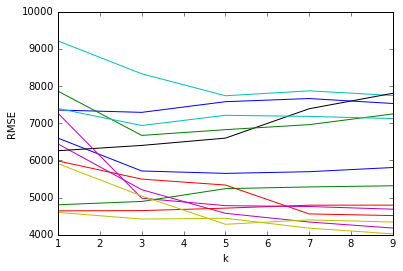

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure()
for feature in feature_cols:
    plt.plot(uni_rmse_df.index, uni_rmse_df[feature], label = feature)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

## Multivariate Model

In [17]:
def knn_train_test(features, target, df):
    # shuffle rows in df
    np.random.seed(1)
    # Passing list-likes to .loc or [] with any missing label will raise KeyError in the future, you can use .reindex() as an alternative.
    # should not use len(df) here because index has missing (some rows were filtered out earlier)
    df_shuffle = df.reindex(np.random.permutation(df.index))
 
    # split data to training and test set
    split = round(len(df_shuffle)/2)
    train_df = df_shuffle.iloc[0:split]
    test_df = df_shuffle.iloc[split:len(df)]
    
    # fit model, predict and calculate error
    model = KNeighborsRegressor()
    model.fit(train_df[features], train_df[target])
    prediction = model.predict(test_df[features])
    rmse = mean_squared_error(test_df[target], prediction)**(1/2)
    return rmse  

In [19]:
rmse_best2 = knn_train_test(["highway_mpg", "engine_size"], "price", cars_numeric)
rmse_best3 = knn_train_test(["highway_mpg", "engine_size", "curb_weight"], "price", cars_numeric)
rmse_best4 = knn_train_test(["highway_mpg", "engine_size", "curb_weight", "horsepower"], "price", cars_numeric)
rmse_best5 = knn_train_test(["highway_mpg", "engine_size", "curb_weight", "horsepower", "city_mpg"], "price", cars_numeric)
print(rmse_best2, rmse_best3, rmse_best4, rmse_best5)

3506.72248129571 4105.874224425795 3888.275925256313 4008.2845988221243


### Try different k values for the top3 models

In [30]:
def knn_train_test(features, target, df, k):
    # shuffle rows in df
    np.random.seed(1)
    # Passing list-likes to .loc or [] with any missing label will raise KeyError in the future, you can use .reindex() as an alternative.
    # should not use len(df) here because index has missing (some rows were filtered out earlier)
    df_shuffle = df.reindex(np.random.permutation(df.index))
 
    # split data to training and test set
    split = round(len(df_shuffle)/2)
    train_df = df_shuffle.iloc[0:split]
    test_df = df_shuffle.iloc[split:len(df)]
    
    # fit model, predict and calculate error
    model = KNeighborsRegressor(n_neighbors= k)
    model.fit(train_df[features], train_df[target])
    prediction = model.predict(test_df[features])
    rmse = mean_squared_error(test_df[target], prediction)**(1/2)
    return rmse  

In [41]:
best_features = {"2 features":["highway_mpg", "engine_size"],
                "4 features":["highway_mpg", "engine_size", "curb_weight", "horsepower"],
                "5 features":["highway_mpg", "engine_size", "curb_weight", "horsepower", "city_mpg"]}
key

'2 features'

In [42]:
mul_k_rmse = {}
k_list = list(range(1,26))
best_features = {"2 features":["highway_mpg", "engine_size"],
                "4 features":["highway_mpg", "engine_size", "curb_weight", "horsepower"],
                "5 features":["highway_mpg", "engine_size", "curb_weight", "horsepower", "city_mpg"]}
for key, features in best_features.items():
    mul_k_rmse[key] = []
    for k in k_list:
        rmse = knn_train_test(features, 'price', cars_numeric, k)
        mul_k_rmse[key].append(rmse)
    

mul_rmse_df = pd.DataFrame(mul_k_rmse, index = k_list)   
mul_rmse_df    

,2 features,4 features,5 features
1,4137.771260,3696.644380,3896.636620
2,3665.100935,3827.228023,3705.485907
3,3123.994546,4013.053802,3713.705163
4,3026.148705,3842.373752,3862.447236
5,3506.722481,3888.275925,4008.284599
6,3994.920915,4036.375320,4153.969875
7,4083.590936,4152.156952,4036.948575
8,4132.647906,4166.555072,3984.976821
9,4264.678573,4191.214303,4042.051108
10,4292.619148,4301.629449,4065.074476


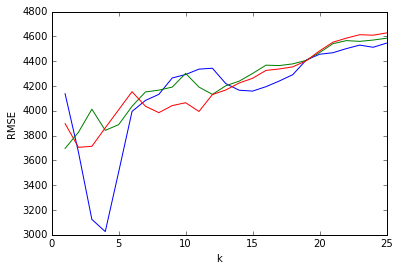

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
for feature in mul_rmse_df.columns:
    plt.plot(mul_rmse_df.index, mul_rmse_df[feature], label = feature)
plt.xlabel("k")
plt.ylabel("RMSE")
plt.show()

For 2 features, k = 4 is optimal.  
For 4 features, k = 1 is optimal.  
For 5 features, k = 2 is optimal.  
K values are different due to the fact that we use different features.